In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('car_prices_dataset.csv')

In [5]:
df.head()

,Make,Model,Year,Mileage,Engine Size (L),Fuel Type,Transmission,Horsepower,Number of Doors,Price ($)
0,Chevrolet,Cruze,2005,41531,3.3,Diesel,Automatic,272,2,5502.62
1,Honda,Accord,2019,129606,1.1,Diesel,Manual,208,4,11718.97
2,Honda,CR-V,2018,95481,3.7,Diesel,Automatic,425,2,16061.98
3,Audi,A6,2021,122983,2.0,Electric,Automatic,261,2,27599.81
4,Mercedes,GLA,2019,105776,2.5,Electric,Automatic,113,4,37560.61


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             100 non-null    object 
 1   Model            100 non-null    object 
 2   Year             100 non-null    int64  
 3   Mileage          100 non-null    int64  
 4   Engine Size (L)  100 non-null    float64
 5   Fuel Type        100 non-null    object 
 6   Transmission     100 non-null    object 
 7   Horsepower       100 non-null    int64  
 8   Number of Doors  100 non-null    int64  
 9   Price ($)        100 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 7.9+ KB


In [7]:
df.shape

(100, 10)

In [8]:

df.isna().sum()

,0
Make,0
Model,0
Year,0
Mileage,0
Engine Size (L),0
Fuel Type,0
Transmission,0
Horsepower,0
Number of Doors,0
Price ($),0


In [9]:
df.describe()

,Year,Mileage,Engine Size (L),Horsepower,Number of Doors,Price ($)
count,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000
mean,2014.580000,101506.26000,3.017000,250.590000,2.84000,16586.673600
std,5.658961,59783.75993,1.102802,110.672791,0.99209,9482.073369
min,2005.000000,6858.00000,1.000000,77.000000,2.00000,5000.000000
25%,2010.750000,43154.75000,2.000000,138.750000,2.00000,9439.452500
50%,2015.000000,108314.00000,2.950000,236.000000,2.00000,14497.045000
75%,2019.000000,151525.00000,3.900000,348.500000,4.00000,21331.452500
max,2023.000000,199515.00000,5.000000,450.000000,4.00000,41117.920000


In [10]:
catagorical_cols = [col for col in df.columns if df[col].dtype == 'object']
catagorical_cols

['Make', 'Model', 'Fuel Type', 'Transmission']

In [11]:
df = pd.get_dummies(df, columns=catagorical_cols)

In [12]:
df.head()

,Year,Mileage,Engine Size (L),Horsepower,Number of Doors,Price ($),Make_Audi,Make_BMW,Make_Chevrolet,Make_Ford,...,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2005,41531,3.3,272,2,5502.62,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,2019,129606,1.1,208,4,11718.97,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2018,95481,3.7,425,2,16061.98,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,2021,122983,2.0,261,2,27599.81,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2019,105776,2.5,113,4,37560.61,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [13]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop('Price ($)', axis=1)
y = df['Price ($)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
model=LinearRegression()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict car prices on the test set
y_pred = model.predict(X_test)



In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")



Mean Squared Error (MSE): 3028455.66
R-squared (R²): 0.97


In [18]:
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 1740.25


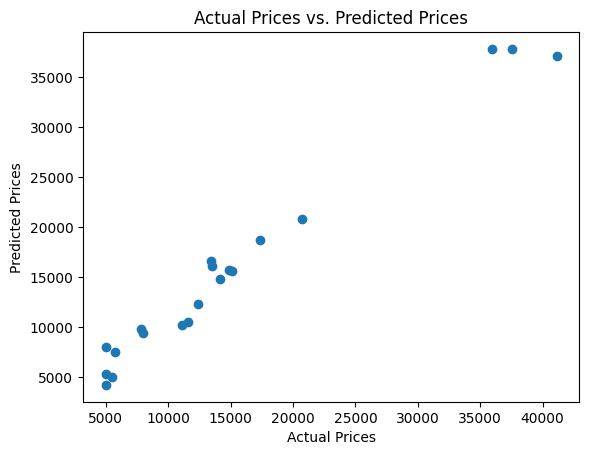

In [21]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

In [22]:
# Retrieve the coefficients
coefficients = model.coef_
feature_names = X.columns

# Create a DataFrame for better readability
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
display(coeff_df)


,Feature,Coefficient
18,Model_A6,1.231916e+17
37,Model_Q5,1.231916e+17
11,Make_Kia,1.105669e+17
17,Model_A4,6.255085e+16
14,Make_Volkswagen,4.204533e+16
30,Model_Focus,3.977795e+16
31,Model_Fusion,3.397807e+16
12,Make_Mercedes,2.936494e+16
29,Model_Explorer,2.659490e+16
23,Model_Civic,2.057458e+16


In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

df_poly = pd.concat([df, X_poly_df], axis=1)


In [28]:
print(len(X_train), len(y_pred))


80 20


In [34]:
X_train = X_train[:len(y_pred)]

array([[-1.70141877, -1.23862128,  0.16677689, ..., -0.43643578,
         0.90453403, -0.90453403],
       [ 0.60739584,  0.1955269 ,  0.71358635, ...,  2.29128785,
         0.90453403, -0.90453403],
       [ 1.49540146, -1.43405169,  0.80472126, ..., -0.43643578,
         0.90453403, -0.90453403],
       ...,
       [ 1.31780034,  1.64643588, -1.20024677, ..., -0.43643578,
        -1.1055416 ,  1.1055416 ],
       [-1.70141877,  0.25379459, -0.19776276, ..., -0.43643578,
         0.90453403, -0.90453403],
       [-0.28060978, -0.28327339,  1.07812599, ...,  2.29128785,
        -1.1055416 ,  1.1055416 ]])

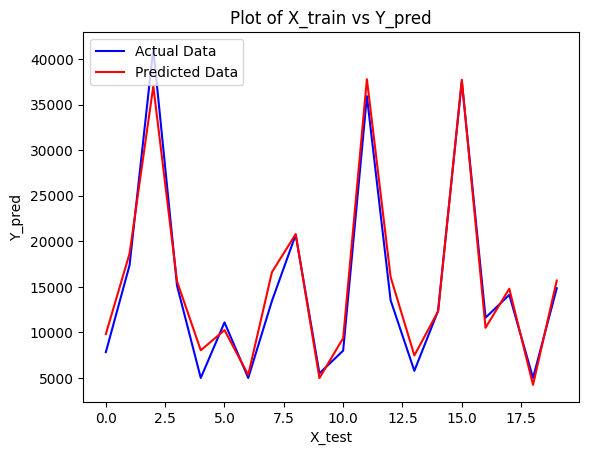

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_pred)),y_test, color='blue', label='Actual Data')
plt.plot(range(len(y_pred)),y_pred, color='red', label='Predicted Data')
plt.legend()
plt.xlabel('X_test')
plt.ylabel('Y_pred')
plt.title('Plot of X_train vs Y_pred')
plt.show()

